In [1]:
#import library
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
#Sample Dataset
BasicInfo={
    "Name":['Munna','Robiul','Sayem'],
    "Age":['27','32','24'],
    "Study":['MSc','MSc',"BSc"],
    "Home_Country":['Bangladesh','Bangladesh','Bangladesh'],
}

In [3]:
data=pd.DataFrame(BasicInfo, columns=['Name','Age','Study','Home_Country'])

In [4]:
data

,Name,Age,Study,Home_Country
0,Munna,27,MSc,Bangladesh
1,Robiul,32,MSc,Bangladesh
2,Sayem,24,BSc,Bangladesh


### Making Triples

In [5]:
triples=[]
for _,row in data.iterrows():
    name= (row['Name'], "AgeOf", row['Age'])
    study= (row['Name'], "StudyIn", row['Study'])
    country= (row['Name'], "HomeCountry", row['Home_Country'])
    
    triples.extend((name,study,country))

In [6]:
triples

[('Munna', 'AgeOf', '27'),
 ('Munna', 'StudyIn', 'MSc'),
 ('Munna', 'HomeCountry', 'Bangladesh'),
 ('Robiul', 'AgeOf', '32'),
 ('Robiul', 'StudyIn', 'MSc'),
 ('Robiul', 'HomeCountry', 'Bangladesh'),
 ('Sayem', 'AgeOf', '24'),
 ('Sayem', 'StudyIn', 'BSc'),
 ('Sayem', 'HomeCountry', 'Bangladesh')]

In [7]:
triples_data=pd.DataFrame(triples, columns=["Subject", "Predicate", "Object"])

In [8]:
triples_data 

,Subject,Predicate,Object
0,Munna,AgeOf,27
1,Munna,StudyIn,MSc
2,Munna,HomeCountry,Bangladesh
3,Robiul,AgeOf,32
4,Robiul,StudyIn,MSc
5,Robiul,HomeCountry,Bangladesh
6,Sayem,AgeOf,24
7,Sayem,StudyIn,BSc
8,Sayem,HomeCountry,Bangladesh


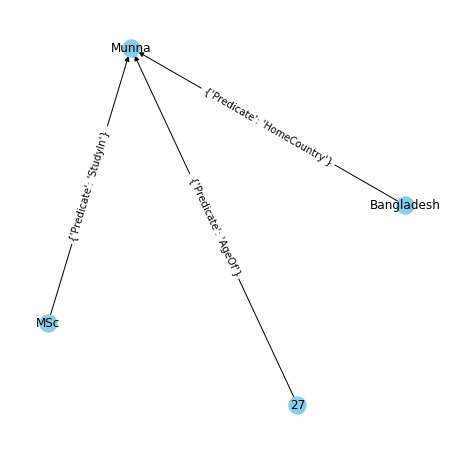

In [16]:
G=nx.from_pandas_edgelist(triples_data[triples_data['Subject']== "Munna"],"Object","Subject", 
                          edge_attr=True, create_using=nx.MultiDiGraph())
plt.figure(figsize=(6,6))
pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
nx.draw_networkx_edge_labels(G, pos=pos)
plt.show()